# Assignment 1 - Data exploration & correlation

Nima Hansen : time spent = 20h, 

Kailash de Jesus Hornig : time spent = 20h, 

## 1a)

Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [1p]                                                              

### Answer)

Assumptions:  #1 Life Expectancy is dependent on the GDP variable, hence GDP per capita was chosen to x value and Life Expectancy to y value. #Year 2015 (the chosen year) is representative for the correlation between GDP per capita and Life Expectancy. We assume that a higher GDP per capita will increase the Life Expectancy to a certain limit.


Decisions:  

#1 only the same year can be compared respectively. In GDP-2015.csv we only had data for year 2015, thereby we have only used the data connected to year 2015 from both the datasets, even though the data file containing life expectancy ranged from 1950-2019. 

#2 Due to decision one, we created a new merged dataset, excluding everything from the life expectancy dataset not corresponding to year 2015, since we were only interested in GDP and LE data points for 2015, this could be seen as a sort of cleaning.  

#3 we choose to use the year 2015, since it is not too outdated from today 2022, and also more representative and interesting for us today and for the near future than years from the 1900-hundreds.  

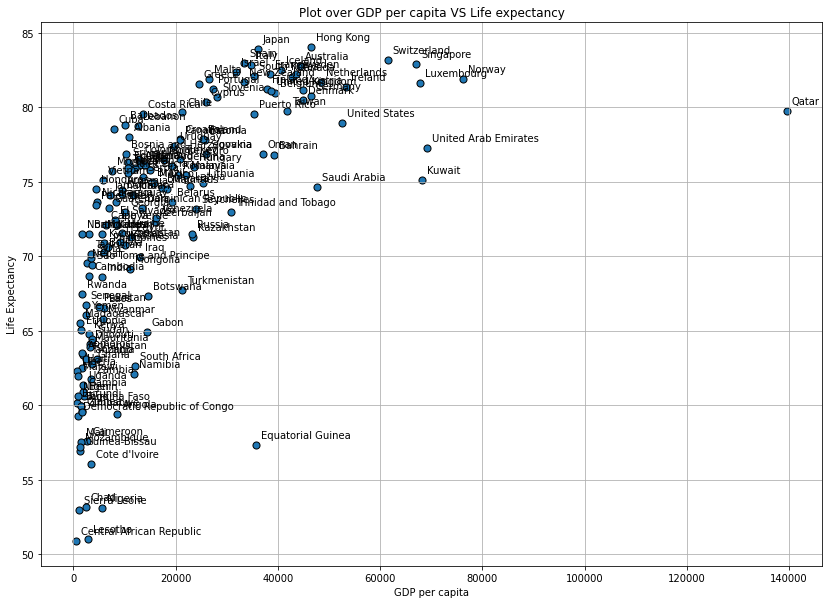

In [1]:
#1a

#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing the data to two pandas dataframes (df_GDP_PC, df_life) from an csv-file
df_GDP_PC = pd.read_csv("/work/GDP-per-capita-2015.csv")
df_life = pd.read_csv("/work/life-expectancy.csv")

#Cleaning, removing "world", as we only want to compare countries.
df_GDP_PC= df_GDP_PC.drop([164])

#merging the two data sets, and making sure that the Entity (country) and year of measure is the same, source for inspiration; #https://datascienceparichay.com/article/pandas-merge-dataframes-on-multiple-columns/
df_merged_one = pd.merge(df_GDP_PC,df_life, on=['Entity','Year','Code'])

#Creating two series, one containing life expectancy and one containing GDP per capita,
Life_expectancy = df_merged_one['Life expectancy']
GDP_PC = df_merged_one['GDP per capita']
countries = df_merged_one['Entity']

#Creating a scatter plot using the GDP data as X-coordinates and life expectancy data as Y-coordinates
#source for inspiration with plot https://saralgyaan.com/posts/matplotlib-tutorial-in-python-chapter-6-scatter-plotting/
plt.figure(figsize=(14, 10)) 
plt.scatter(GDP_PC,Life_expectancy, s=50, alpha=1, edgecolor='black', linewidth=1)
plt.title('Plot over GDP per capita VS Life expectancy')
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
plt.grid('true')

#Labeling each data point by their entity.
for i in range(len(countries)):
    plt.annotate(countries[i],(GDP_PC[i],Life_expectancy[i]),xytext= (5,7),textcoords='offset points')
plt.show()



## 1b)

Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained. [1p]

### Answer)

We can see some typ of positive correlation between GDP per capita and Life expectancy, which we assumed. The expected outcome of finding some relation/pattern around increased GDP resulting in increased LE was expected due to more money (the result of higher GDP) should raise your life standard and possibilities to live better and longer, to a certain degree. After a certain level more wealth cannot buy you a more healthy life which is assumed to be the driver of longevity, and this is noticeable, as we can see some sort of diminishing returns for the increased LE for every extra unit of increased GDP after a certain value on LE (The increase of LE/GDP per capita is higher initially). Additionally, we could see a difference in life expectancy for countries with a similar GDP per capita, which is not that strange as there are several other factors that determine overall health, such as distribution of wealth, impact of pandemics, wars etc.

## 1c)

Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why. [0.5p]

### Answer)

 Data cleaning for a: From the GDP list, we removed all the data in row 164 which corresponded to the Entity "World". It would not make sense to keep one data point of an aggregated data for all countries and compare it to individual countries. This choice will impact d, e, f and g as well, as this led to "world" being removed from the merged list. Read 1a assumptions and decisions.

Data cleaning for d: Here we did not do any more cleaning, we used the same list as before (the merged list) which only contained data related to year 2015. As it makes more sense using the same year through out the whole process, and comparing data from the same year.

Data cleaning for e: In task e, we removed a column from df_merged_two as we created a new merge to include GDP in our data frame, and the file we were using to do so (GDP.csv) had a column that we did not need.

Data cleaning for f: Same as covered above in d.

Data cleaning for g: Same as covered above in d.

## 1d)

Which countries have a life expectancy higher than one standard deviation above the mean? [0.5p] 

### Answer)

The series "Countries_above" contains all the countries that have a life expectancy higher than one standard deviation above the mean. 

In [2]:
#d
#Calculate the mean and standard deviation of Life expectancy
Life_mean = np.mean(df_merged_one['Life expectancy'])
Life_std = np.std(df_merged_one['Life expectancy'])

# Source of inspiration; https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
# select all countries (Entities) above the limit (mean + std)
Countries_above = df_merged_one.loc[df_merged_one['Life expectancy'] > Life_mean + Life_std, 'Entity']
print(Countries_above)

6           Australia
7             Austria
13            Belgium
24             Canada
37             Cyprus
39            Denmark
49            Finland
50             France
54            Germany
56             Greece
62          Hong Kong
64            Iceland
69            Ireland
70             Israel
71              Italy
73              Japan
86         Luxembourg
91              Malta
103       Netherlands
104       New Zealand
109            Norway
118          Portugal
131         Singapore
133          Slovenia
135       South Korea
136             Spain
139            Sweden
140       Switzerland
154    United Kingdom
Name: Entity, dtype: object


## 1e)

Which countries have high life expectancy but have low GDP? [0.5p] 

### Answer)

The series "Countries_hle_lgdp" contains all the countries with a high life expectancy and a low GDP, a total of 72 countries. In this task we needed to complement our data in the data frame "df_merged_one" with data for each country´s GDP from "GDP.csv".  However there was an unnecessary column which we cleaned/removed after the merge. We did also need to calculate the GDP mean. Additionally, we chose that a GDP below mean is low and that a life expectancy above mean is high.

Our first idea was to define "low" as the mean minus one standard deviation, and "high" as mean plus one standard deviation. This gave us 0 results and is not strange since the GDP value mean minus one standard deviation gave a negativ value and hence cannot give any hits (No country will have a negative GDP). Therefore we changed to less strict criteria for "high" and "low" as low < mean and high > mean. 

In [3]:
#e
#reading the data and storing it into the dataframe (df_GDP)
df_GDP = pd.read_csv("/work/GDP.csv")

#merging the series onto our last datafram, making sure entity, year and code is the same
df_merged_two = pd.merge(df_merged_one,df_GDP, on=['Entity','Year','Code'])

# Cleaning: removed an uncessessary column following the GDP.csv file
df_merged_two.pop('417484-annotations')

#Calculate the GDP mean
GDP_mean = np.mean(df_merged_two['GDP'])

#We choose/assume that a GDP below mean is low and a life expectancy above mean is high 
#We are selecting every country (Entity) that has a life expectency > mean AND GDP per capita<mean
Countries_hle_lgdp = df_merged_two.loc[(df_merged_two['Life expectancy'] >= Life_mean) & (df_merged_two['GDP'] <= GDP_mean), 'Entity']

#Printing the result
print(Countries_hle_lgdp)

1                  Albania
2                  Algeria
5                  Armenia
7                  Austria
8               Azerbaijan
              ...         
146    Trinidad and Tobago
147                Tunisia
155                Uruguay
157              Venezuela
158                Vietnam
Name: Entity, Length: 72, dtype: object


## 1f)

Does every strong economy (normally indicated by GDP) have high life expectancy? [1p] 

### Answer)

No, not every country with a strong economy (high GDP) have a high life expectancy as we found 8 out of 31 countries having a high GDP and a low life expectancy given our assumptions of what a high/low GDP and life expectancy is.  Even countries with a very high GDP such as Indonesia (2 650 203 488 256 --> GDP 2015) occur at the list (high GDP, Low life expectancy), meanwhile Sweden according to our definitions of high/low have a low GDP and high life expectancy, with a GDP of 6 times as small as Indonesia (428 683 493 376 --> GDP 2015) .

In [4]:
#whats defined as a high/low life expectancy and GPA is set by our earlier assumption made in task e.

#countries with high gdp and low life expectancy
Countries_highgdp_lowle = df_merged_two.loc[(df_merged_two['Life expectancy'] <= Life_mean) & (df_merged_two['GDP'] >= GDP_mean), 'Entity']

#countries with high gdp and high life expectancy
Countries_highgdp_highle = df_merged_two.loc[(df_merged_two['Life expectancy'] >= Life_mean) & (df_merged_two['GDP'] >= GDP_mean), 'Entity']

#Printing the result
print(Countries_highgdp_lowle)
print('Number of countries with a high GDP but low life expectancy;',len(Countries_highgdp_lowle))

#Printing the countries that fullfills the conditions of having a high gdp and high life expectancy
print(Countries_highgdp_highle)
print('Number of countries with a high GDP and high life expectancy;',len(Countries_highgdp_highle))




44            Egypt
65            India
66        Indonesia
107         Nigeria
111        Pakistan
116     Philippines
122          Russia
134    South Africa
Name: Entity, dtype: object
Number of countries with a high GDP but low life expectancy; 8
4                 Argentina
6                 Australia
18                   Brazil
24                   Canada
29                    China
50                   France
54                  Germany
67                     Iran
71                    Italy
73                    Japan
89                 Malaysia
94                   Mexico
103             Netherlands
117                  Poland
126            Saudi Arabia
135             South Korea
136                   Spain
141                  Taiwan
144                Thailand
148                  Turkey
152    United Arab Emirates
153          United Kingdom
154           United States
Name: Entity, dtype: object
Number of countries with a high GDP and high life expectancy; 23


## 1g)

Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f. [1p] 

### Answer)

The answer is still no, not every strong economy has a high life expectancy. However, using GDP per capita instead gave us a much lower share of countries with a strong economy (high GPA per capita) and a low life expectancy, only 4 out of 60 had a low life expectancy given a strong economy (high GPA per capita). 56/60 had a high life expectancy given a strong economy (high gpa per capita). To add, in our opinion, the difference between G and F are not that surprising. Lets say, if Sweden had the same GDP but half the population, the (GDP per capita) would be doubled, therefore its important to include the population as this will impact each persons wealth hugely, it would not make sense to assume that the conditions for country A and B is the same just because they have the same GDP if A would have a population 10x bigger and the same applies here.

On the other hand we can also argue that countries with a low population, a few strong businesses and a skew income distribution can very well have lower levels of life expectancy meanwhile having a high GDP per capita. Similar to the four countries in question g. And therefore a high life expectancy cannot be indicated by a strong economy alone as there are several other factors playing their part. 

Conclusion when comparing f and g, using GDP in absolute numbers as an indicator for a strong economy is not the best choice when talking about the life expectancy, as we assume the life expectancy is very connected to each persons access to healthcare, food, water, a roof over their heads an so on. 

In [5]:
#g

#Calculate the GDP per capita mean
GDP_PC_mean = np.mean(df_merged_two['GDP per capita'])

#whats defined as a high/low life expectancy and GPA per capita is set by our earlier assumption made in task e.
Countries_hgdppc_lle = df_merged_two.loc[(df_merged_two['Life expectancy'] <= Life_mean) & (df_merged_two['GDP per capita'] >= GDP_PC_mean), 'Entity']
Countries_hgdppc_hle = df_merged_two.loc[(df_merged_two['Life expectancy'] >= Life_mean) & (df_merged_two['GDP per capita'] >= GDP_PC_mean), 'Entity']

#Printing the result,if it contains countries, the answer should be no
print(Countries_hgdppc_lle)
print('Number of countries with a high GDP per capita but low life expectancy;',len(Countries_hgdppc_lle))

#Printning the countries that fullfills the conditions of having a high GDP per capita and High life expectancy
print(Countries_hgdppc_hle)
print('Number of countries with a high GDP per capita and high life expectancy;',len(Countries_hgdppc_hle))

46     Equatorial Guinea
75            Kazakhstan
122               Russia
149         Turkmenistan
Name: Entity, dtype: object
Number of countries with a high GDP per capita but low life expectancy; 4
4                 Argentina
6                 Australia
7                   Austria
9                   Bahrain
12                  Belarus
13                  Belgium
24                   Canada
28                    Chile
35                  Croatia
37                   Cyprus
39                  Denmark
47                  Estonia
49                  Finland
50                   France
54                  Germany
56                   Greece
62                Hong Kong
63                  Hungary
64                  Iceland
69                  Ireland
70                   Israel
71                    Italy
73                    Japan
77                   Kuwait
80                   Latvia
85                Lithuania
86               Luxembourg
89                 Malaysia
91            

# 2

Download some other data sets, e.g. related to happiness and life satisfaction, trust, corruption, etc. Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [2.5p]

## 2.1. First Comparison - Life satisfaction VS deaths from suicides

How does the average life satisfaction impact the share of deaths from suicides?

Assumptions: We assume that a higher life satisfaction will lower the share of deaths from suicides, that's our intuitive guess. Additionally, this is the reason behind using Life satisfaction as "x" and the share of deaths from suicide as "y", as the first likely being the driver for the second.

Decisions: We decided to choose the latest possible year (2019) available in the datasets to best possibly reflect today's reality and situation. We also cleaned the null values and removed unnecessary columns from both the data sets. Lastly we plotted our data in scatter plots to look for some type of correlation and/or pattern. 

In [6]:
#How does the average life satisfaction impact the share of deaths from suicides?

#Imports
import plotly.express as px

#reading the data and storing it into the dataframes
df_satisfaction = pd.read_csv("/work/life-satisfaction.csv")
df_suicide = pd.read_csv("/work/share-deaths-suicide.csv")

#Filtering data based on year 2019 
#Source of inspiration: https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
df_satisfaction_2019 = df_satisfaction[df_satisfaction['Year']==2019]
df_suicide_2019 = df_suicide[df_suicide['Year']==2019]

#Cleaning: remove unnecessary columns 
df_satisfaction_2019 = df_satisfaction_2019[['Entity', 'Year','Life satisfaction in Cantril Ladder (World Happiness Report 2022)']]
df_suicide_2019 = df_suicide_2019[['Entity','Year','Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)']]

#Cleaning: remove all null values
df_satisfaction_2019 = df_satisfaction_2019.dropna()

#merging the two data sets, and making sure that the Entity (country) and year of measure is the same
df_merged_three = pd.merge(df_satisfaction_2019,df_suicide_2019, on=['Entity','Year'], how='left')


#Creating a scatter plot using the life satisfaction data as X-coordinates and share of deaths from suicide data as Y-coordinates
## Plotly version
fig = px.scatter(df_merged_three, x='Life satisfaction in Cantril Ladder (World Happiness Report 2022)', 
  y='Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)', 
  labels= {'Life satisfaction in Cantril Ladder (World Happiness Report 2022)' : 'Life Satisfaction', "Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)": "Share of deaths from Suicide"})
fig.show()


Analysis/conclusions: From this plot there is no clear relation or path that the data follows. Trying to find a pattern in the data one can however see that the values on the right hand side of the middle x-value have slightly higher y-values than the left hand side. This could be interpreted as a weak pos. correlation. This observation of a positive correlation is however going against out intuitive guess of that a higher life satisfaction could contribute to fewer deaths from suicide, i.e. a negative correlation. 

Given that the results go against our guess, we could discuss whether the guess was bad from the beginning, however there also could be reason to question the datas suitability for this investigation. Per example, we have no information about how the data has been collected, the definitions and the questions that were asked (especially for life satisfaction), or how overall life satisfaction really contributes to less suicidal tendencies in people. 

The end conclusion here is that the relation between the data series is inconclusive, due to an insufficient pattern.  

## 2.2. Second Comparison - Average years of schooling VS GDP per capita

2.2.1: How does average years of schooling impact countries' GDP per capita?

2.2.2: Do the countries with the highest average years of schooling always have a high level of GDP per capita?

2.2.3: Is there a big spread of countries average years of schooling and GDP per capita?

2.2.4: Is there a correlation between the two variables of average years of schooling and GDP per capita for different countries over time?

### 2.2.1: How does the avg. year of schooling impact countries' GDP per capita?

Assumptions: We assume that a higher average in terms of years of schooling should lead to a more competent and productive work force, where a bigger proportion of the population is contributing to the GDP. Additionally, this is the reason behind using average years of schooling as "x" and the GDP per capita as "y", as the first likely being the driver for the second. 

Decisions: We decided to choose the latest possible year available in the dataset, here 2017. Afterwards, we decided to clean data and only keep the necessary columns. We plotted our data in scatter plots to look for some type of correlation and/or pattern. We decided to use the GDP per capita as we believe it's a more fair measurement than GDP, given our assumption that a bigger proportion of the population will be able to contribute to the GDP when having a higher average in years of schooling. Hence we can't compare GDP in absolute terms as countries have different sizes of populations. 

We did also decided to make a second plot including a polynomial regression line as we spottet a sort of pattern and wanted to play around with a regression line/model to better see the deviations from different individual data points to this relation.

In [7]:
#Years of schooling vs GDP per capita 2017


# Importing the data to two pandas dataframes from an csv-file
df_yearsofschooling = pd.read_csv("/work/years-of-schooling.csv")
df_gdp_percapita = pd.read_csv("/work/gdp-per-capita.csv")

#Filtering data based on year (2017)
df_yearsofschooling_2017 = df_yearsofschooling[df_yearsofschooling['Year']==2017]
df_gdp_percapita_2017 = df_gdp_percapita[df_gdp_percapita['Year']==2017]

#Removes the unecessary columns/choosing the necessary columns
df_yearsofschooling_2017 = df_yearsofschooling_2017[['Entity', 'Year','Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']]
df_gdp_percapita_2017 = df_gdp_percapita_2017[['Entity','Year','GDP per capita, PPP (constant 2017 international $)']]

#merging the two dataframes, and making sure that the Entity and Year is the same
df_merged_four = pd.merge(df_yearsofschooling_2017,df_gdp_percapita_2017, on=['Entity','Year'])

#Plitting the figure and changing the x- and y-axis label using plotly's library
fig = px.scatter(df_merged_four,
 x="Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",
 y="GDP per capita, PPP (constant 2017 international $)",
 text="Entity", width=1000, height=600 ,color ="GDP per capita, PPP (constant 2017 international $)" ,labels= {"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))" : "Avarage Years of Schooling", "GDP per capita, PPP (constant 2017 international $)": "GDP per Capita"})

#Centering each countries name above the data points
fig.update_traces(textposition='top center')

#naming and centering the title in the middle 
fig.update_layout(title_text='Avarage Years of Schooling vs GDP per Capita',title_x = 0.5)

fig.show()

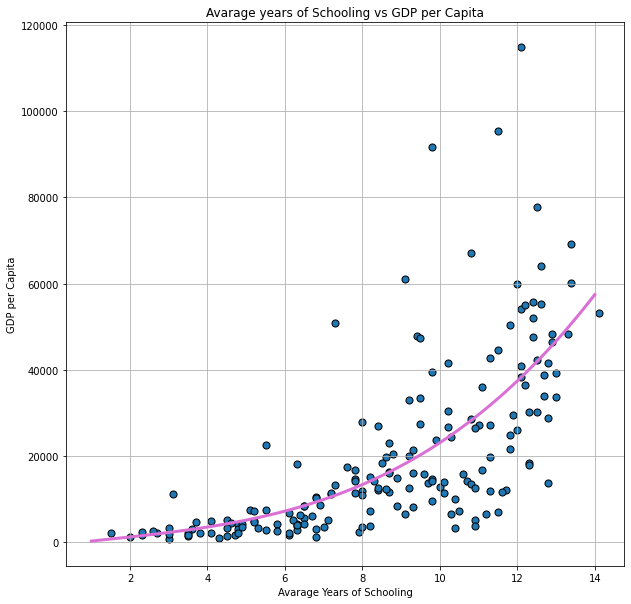

In [8]:
#Years of schooling vs GDP per capita 2017 - Polynomial regression

#source of inspiration (https://www.w3schools.com/python/python_ml_polynomial_regression.asp)

#Creating two series, one containing avarage years of schooling and one containing gdp per capita
Avarage_year = df_merged_four['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']
GDP_percapita = df_merged_four['GDP per capita, PPP (constant 2017 international $)']

#Creating our polynomial regression model basen on our X- and Y- values
model = np.poly1d(np.polyfit(Avarage_year,GDP_percapita,3))
line = np.linspace(1,14,100)

#Creating a Scatter plot and adding a regression line
plt.figure(figsize=(10, 10)) #needed to make it more readable
plt.scatter(Avarage_year,GDP_percapita, s=50, alpha=1, edgecolor='black', linewidth=1)
plt.plot(line,model(line),color = 'orchid',linewidth=3)
plt.title('Avarage years of Schooling vs GDP per Capita')
plt.xlabel('Avarage Years of Schooling')
plt.ylabel('GDP per Capita')
plt.grid('true')
plt.show()

Analysis/Conclusion: The first plot is a bit messy, however we can identify some cases where countries that have high average years of schooling (such as the Nordic countries Denmark, Sweden and Finland) have a high GDP per capita (top-right corner) and many cases where countries that have a low average year of schooling, such as the African countries Burkina Faso, Chad, Niger, Senegal and Burundi have a low GDP per capita (bottom-left corner). However, we can also see countries with a very low GDP per capita despite their high level of average years of education, such as Tajikistan, Kyrgyzstan & Uzbekistan who all are in the same geographical region, i.e. central Asia. We can also identify some outliers such as Qatar, Singapore, Luxembourg, United Arab Emirates and Brunei having a very high GDP per capita given their average years of schooling. 

Looking at the second graph we could identify a positive exponential relationship. We could also see how the marginal increase increases as more as we move to the right on the X-axis (increase the average years of education). In the beginning the curve is relatively flat, meaning that an increase in the beginning does not result in any significant increase in the GDP per capita, however, going beyond 6 years in education, we could see a steep increase in the GDP per capita. 

In summary there seems to be a threshold value around 5-6 years of schooling where the additional time spent on education really yields higher returns in terms of a higher GDP per capita. Interesting is that some countries with high levels (10-12yrs) of schooling still can't seem to make use of it equally as good as some others, the exact reason for this needs to be further investigated though.  

### 2.2.2: Do the countries with the highest avg. years of schooling always have a high GDP per capita?

Assumptions: We assume that the countries with the highest average year of schooling also will have a high level of GDP per capita.

Decisions: We chose to define the "highest" average years of schooling countries as those countries that have an average years of schooling above the 80% percentile, and "high" GDP per capita as above the mean. We also choose to visualize the answer by a scatter plot, where we added a red horizontal line corresponding to the GDP mean. All countries below this horizontal line (in the red area), have a low GDP per capita despite being in the top in terms of average years of schooling. All countries above (in the green area) have a high GDP per capita as well as being in top in terms of average years of schooling. Worth to mention is that we could also have made this by just adding a condition to our merge, however we thought that the visualisation was worth it.

In [9]:
#Do the countries with the highest average year of schooling always have a high GDP per capita?

#Choosing the countries above the 80% percentile
Avarage_year_80 = np.percentile(Avarage_year,80)
GDP_percapita_mean = np.mean(GDP_percapita)

#Selecting all countries with a "avarage years of schooling" value above the 80% percentile
Top_countries = df_merged_four.loc[df_merged_four['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))'] >= Avarage_year_80, 'Entity']

#Removing the rows not related to the top countries
df_merged_four = df_merged_four[df_merged_four['Entity'].isin(Top_countries)]

# Plotting a scatter plot with plotly
fig = px.scatter(df_merged_four,
 x="Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",
 y="GDP per capita, PPP (constant 2017 international $)",
 text="Entity", width=1000, height=600 , labels= {"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))" : "Avarage Years of Schooling", "GDP per capita, PPP (constant 2017 international $)": "GDP per Capita"})

#Setting the "Entity" text centered above the data points
fig.update_traces(textposition='top center')

#Add a horizontal line and a red area showing the countries below the GDP mean.
fig.add_hline(y=GDP_percapita_mean, line_dash = 'dash' ,line_color = 'red')
fig.add_hrect(y0=0, y1=GDP_percapita_mean, line_width=0, fillcolor="red", opacity=0.2)
fig.add_hrect(y0=GDP_percapita_mean, y1=123000, line_width=0, fillcolor="green", opacity=0.2)

#naming and centering the title in the middle 
fig.update_layout(title_text='Avarage year of schooling vs GDP per capita',title_x = 0.5)
fig.show()

Analysis/conclusion: As there are countries in the red area (High GDP per capita & low Average years of schooling), the answer is no. Every country with a high average year of schooling does not have a high GDP per capita. We could identify four countries Belarus, Palau, Armenia and Georgia that proves this. However, its important to emphasise that the result is very dependent on our definitions of what a high and low GDP per capita is, as well as what a high and low average years of schooling is. 

### 2.2.3: Is there a big spread of countries' avg. years of schooling and GDP per capita?

Assumptions: Assume to see a low share of countries with a relatively high GDP, additionally we expect to see more countries with relatively high average years of education. 

Decision: We decided to use a violin plot in order to visualize the distribution of our numerical data, we could have just used a kernels density plot but we believe that the violin plot give a better understanding of the data as it both shows the density and the statistics a box plot would have shown, including the median etc.

this is the mean of GDP per capita: 20082.075246231332
this is the mean of Avarage year of schooling: 8.590055248618786


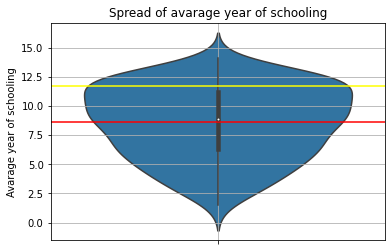

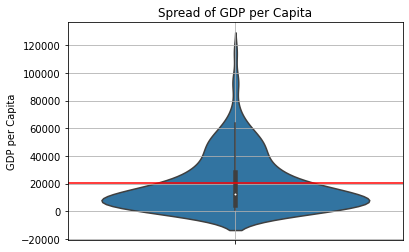

In [10]:
#Spread of countries' avarage years of schooling and GDP per capita
#Imports
import seaborn as sns

# Source of inspiration https://mode.com/blog/violin-plot-examples/
print('this is the mean of GDP per capita:',np.mean(GDP_percapita))
print('this is the mean of Avarage year of schooling:', np.mean(Avarage_year))

#Create a violin plot for Avarage years of schooling
ax1 = sns.violinplot(y=Avarage_year)
ax1.set_title("Spread of avarage year of schooling")
ax1.set_ylabel("Avarage year of schooling")
ax1.axhline(np.mean(Avarage_year), color='red')
ax1.axhline(np.percentile(Avarage_year,80), color='yellow')
ax1.grid(True)
plt.show()

#creating a second violin plot for GDP per Capita
ax2 = sns.violinplot(y=GDP_percapita)
ax2.set_title("Spread of GDP per Capita")
ax2.set_ylabel("GDP per Capita")
ax2.axhline(np.mean(GDP_percapita), color='red')
ax2.grid(True)
plt.show()

Analysis/Conclusion: The shape of the distribution (being wider at the top) indicates that the average year of schooling is concentrated above the median, and even above the mean (The red horizontal line). This means that there are plenty of countries with an average years of schooling centered a bit above the mean (between 10-12.5 years), but there are also plenty of countries ranging below that. 

In contrast, the shape of the distribution for the GDP per capita (thin at the top, wide at the bottom below the median) indicates that GDP per capita is highly concentrated slightly below the median (the grey small dot), which is below the mean (The red horizontal line). Which indicates that many countries have an GDP per capita below the mean but there are also some countries with relatively high GDPs, for example the outliers above the end of the smaller grey line (around 65 000 GPA per capita). 

Given these results, we can see that we have a high share of countries are a bit above the mean of the average years of schooling, At the same time, we have a high share of countries below the mean of the GDP per capita. 

Could we possible have use these plots to define the "high" and "low" levels smarter for our previous green/red plot found above? 

For example, high could be defined as a value above the widest part of the violin-plot and low could be defined as below, if we define these  as high or low relative to other countries. Looking at the yellow line (the threshold level chosen in previous green/red plot) in the first violin-plot, and the red (same as mean) in the second, we can see that our earlier definitions of a high average years of schooling and a low GDP per capita, after viewing this plot and seeing its distribution was might have been too harsh. Namely, the threshold level for GDP might have been too high and could be lowered a bit.  

### 2.2.4: Is there a correlation between the two variables of avg. years of schooling and GDP per capita for different countries over many years?

Assumptions: Based on earlier plots, we assume that the different lines (GDP per capita & average years of schooling) will follow each other pretty well. We also assume that the data for the countries chosen is representative for other countries, otherwise we would not be able to generalise and draw any conclusion except for Sweden, Finland and Norway individually. 

Decisions: First we decided to plot two nordic countries GDP per capita and average years of schooling over time to see how well they follow each others direction. As one graph showed a pretty good relation (Sweden) and the other not (Finland), we decided to add Norway to generate a more grounded conclusion of the data. Of course the optimal conclusion would have been based on even more than three countries and maybe use of a probability sample (random selecting countries), but due to a time limit and that some data is missing for some countries, we choose not to. Additionally we chose the interval from 1997-2017. We chose 2017 as we did not have enough data for more recent years and 1997 because we thought that 20 years of data is enough to draw some conclusions.

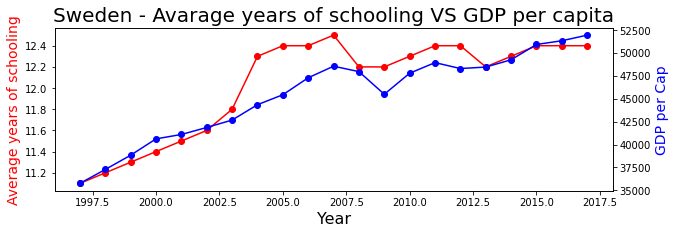

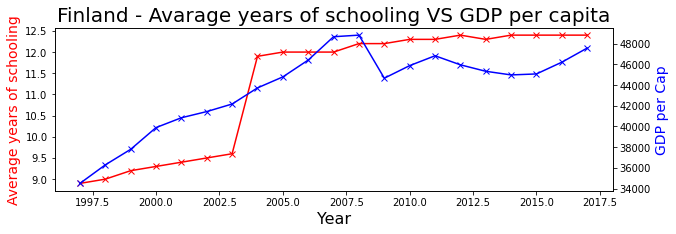

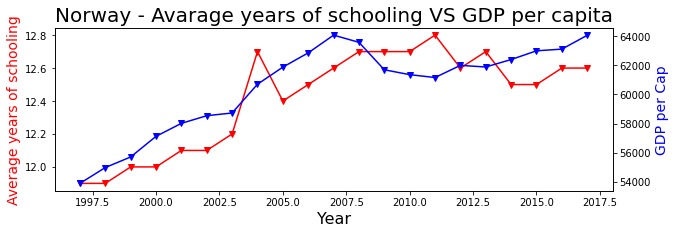

In [ ]:
#Years of schooling vs GDP per capita 2017

#Importing the data to two pandas dataframes from an csv-file
df_yearsofschooling = pd.read_csv("/work/years-of-schooling.csv")
df_gdp_percapita = pd.read_csv("/work/gdp-per-capita.csv")

#Filtering data based on years 1997-2017, using linspace to make a series containing the years if interest
s = pd.Series(np.linspace(1997, 2017, 21))
df_yearsofschooling_1997_2017 = df_yearsofschooling[df_yearsofschooling['Year'].isin(s)]
df_gdp_percapita_1997_2017 = df_gdp_percapita[df_gdp_percapita['Year'].isin(s)]

# selecting only Finland, Sweden & Norway
df_yearsofschooling_1997_2017_Sweden = df_yearsofschooling_1997_2017[df_yearsofschooling_1997_2017['Entity'].isin(['Sweden'])]
df_gdp_percapita_1997_2017_Sweden = df_gdp_percapita_1997_2017[df_gdp_percapita_1997_2017['Entity'].isin(['Sweden'])]
df_yearsofschooling_1997_2017_Finland = df_yearsofschooling_1997_2017[df_yearsofschooling_1997_2017['Entity'].isin(['Finland'])]
df_gdp_percapita_1997_2017_Finland = df_gdp_percapita_1997_2017[df_gdp_percapita_1997_2017['Entity'].isin(['Finland'])]
df_yearsofschooling_1997_2017_Norway = df_yearsofschooling_1997_2017[df_yearsofschooling_1997_2017['Entity'].isin(['Norway'])]
df_gdp_percapita_1997_2017_Norway = df_gdp_percapita_1997_2017[df_gdp_percapita_1997_2017['Entity'].isin(['Norway'])]

#merging the data sets, and making sure that the Entity and Year is the same source for inspiration; #https://datascienceparichay.com/article/pandas-merge-dataframes-on-multiple-columns/
df_merged_seven = pd.merge(df_yearsofschooling_1997_2017_Sweden,df_gdp_percapita_1997_2017_Sweden, on=['Entity','Year'])
df_merged_eight = pd.merge(df_yearsofschooling_1997_2017_Finland,df_gdp_percapita_1997_2017_Finland, on=['Entity','Year'])
df_merged_nine = pd.merge(df_yearsofschooling_1997_2017_Norway,df_gdp_percapita_1997_2017_Norway,on=['Entity','Year'])

#Creating seven series
Avarage_year_Sweden = df_merged_seven['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']
GDP_percapita_Sweden = df_merged_seven['GDP per capita, PPP (constant 2017 international $)']
Avarage_year_Finland = df_merged_eight['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']
GDP_percapita_Finland= df_merged_eight['GDP per capita, PPP (constant 2017 international $)']
Avarage_year_Norway= df_merged_nine['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']
GDP_percapita_Norway= df_merged_nine['GDP per capita, PPP (constant 2017 international $)']
Years_Sweden_Finland_Norway = df_merged_seven['Year']

#plotting each country Sweden VS Finland VS Norway
# inspiration: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

# Start with Sweden
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,3))
# make a plot
ax.plot(Years_Sweden_Finland_Norway,
        Avarage_year_Sweden,
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("Year", fontsize = 16)
# set y-axis label
ax.set_ylabel("Average years of schooling",
              color="red",
              fontsize=14)
ax.set_title("Sweden - Avarage years of schooling VS GDP per capita", fontsize = 20)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Years_Sweden_Finland_Norway, GDP_percapita_Sweden,color="blue",marker="o")
ax2.set_ylabel("GDP per Cap",color="blue",fontsize=14)
plt.show()

# Same for FINLAND 
fig,ax = plt.subplots(figsize=(10,3))
# make a plot
ax.plot(Years_Sweden_Finland_Norway,
        Avarage_year_Finland,
        color="red", 
        marker="x")
# set x-axis label
ax.set_xlabel("Year", fontsize = 16)
# set y-axis label
ax.set_ylabel("Average years of schooling",
              color="red",
              fontsize=14)
ax.set_title("Finland - Avarage years of schooling VS GDP per capita", fontsize = 20)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Years_Sweden_Finland_Norway, GDP_percapita_Finland,color="blue",marker="x")
ax2.set_ylabel("GDP per Cap",color="blue",fontsize=14)
plt.show()

#Same for Norway
fig,ax = plt.subplots(figsize=(10,3))
# make a plot
ax.plot(Years_Sweden_Finland_Norway,
        Avarage_year_Norway,
        color="red", 
        marker="v")
# set x-axis label
ax.set_xlabel("Year", fontsize = 16)
# set y-axis label
ax.set_ylabel("Average years of schooling",
              color="red",
              fontsize=14)
ax.set_title("Norway - Avarage years of schooling VS GDP per capita", fontsize = 20)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Years_Sweden_Finland_Norway, GDP_percapita_Norway,color="blue",marker="v")
ax2.set_ylabel("GDP per Cap",color="blue",fontsize=14)
plt.show()

Conclusion/Analysis: Starting with Sweden, the two lines follow each other's directions pretty well and at a first glance changes in average years of schooling are followed with a similar change in GDP per capita. However, when looking at Finland and Norway (especially Finland), this pattern is not as apparent, which indicates other driving factors as well. This is not entirely surprising. 

Additionally, we could expect a lag in GDP per Capita, as one might expect that a high level of average years of schooling needs to be held for a longer period of time in order to have an impact and make a country more competent and productive, which we in the beginning of this comparison assumed a higher average year of schooling would generate. 

Furthermore, it would have been interesting to analyse countries that have had a really low average years of schooling and then have had a high level, and those countries' change in GDP per capita during the same period.

## 2.3. Third Comparison - Avg. years of schooling VS Life satisfaction

 If average years of schooling impact countries GDP per capita and if then GDP per capita impact life satisfaction, could we then say that average years of schooling also impact life satisfaction?

### Testing GDP per capita's impact on life satisfaction

Assumptions : Our assumption is that a higher GDP per capita will raise the life satisfaction of the population. Additionally, this is the reason behind using GDP per capita as "x" and life satisfaction as"y", as the first likely can be a driver for the second. Furthermore, we do not take into account wealth inequality which of course could have an impact on the expected values for average years of schooling given GDP per capita, or for the the average life satisfaction given GDP per capita. So given that we do not take that into account, we assume that the wealth is equally distributed and that GDP per capita is a fair measure of how well the majority of the population is doing and living.

Decision : We decided to choose the same year of comparison (2017) as before in the second comparison as we are still investigating the same subjects (average year of schooling, GDP per capita, life satisfaction) and want to do so for the same period. Afterwards, we decided to clean our data by only keeping the necessary columns and dropping the rows with null values in the merged dataframe. Lastly we decided to create a scatter plot in trying to spot a sort of pattern and as we did identify a polynomial pattern, we also decided to add another plot with a polynomial regression line.

In [12]:
#GPA per capita vs Life satisfaction

#Importing the data to a dataframe from an csv-file
df_life_satisfaction = pd.read_csv('/work/life-satisfaction.csv')

#Filtering data based on year, has already been done for GDP per capita in an earlier task
#using the same variable as then to avoid repeting code.
df_life_satisfaction_2017 = df_life_satisfaction[df_life_satisfaction['Year']==2017]

#Choosing the relevant columns, has already been done for GDP per capita in an earlier task, using the same variable as then.
df_life_satisfaction_2017 = df_life_satisfaction_2017[['Entity', 'Year','Life satisfaction in Cantril Ladder (World Happiness Report 2022)']]

#dropping all rows with null values
df_life_satisfaction_2017 = df_life_satisfaction_2017.dropna()

#merging the dataframes, and making sure that the Entity & Year is the same, using same source of inspiration as before.
df_merged_five = pd.merge(df_life_satisfaction_2017,df_gdp_percapita_2017, on=['Entity','Year'])

#Creating a scatter plot using plotly
fig = px.scatter(df_merged_five,
 x="GDP per capita, PPP (constant 2017 international $)",
 y="Life satisfaction in Cantril Ladder (World Happiness Report 2022)",
 text="Entity", width=1000, height=600 , color='Life satisfaction in Cantril Ladder (World Happiness Report 2022)', labels= {"Life satisfaction in Cantril Ladder (World Happiness Report 2022)" : "Life Satisfaction", "GDP per capita, PPP (constant 2017 international $)": "GDP per Capita"})

#Setting the "Entity" text centered above the data points
fig.update_traces(textposition='top center')

#naming and centering the title in the middle 
fig.update_layout(title_text='GDP per Capita VS Life satisfaction',title_x = 0.5)

#giving the plot a nice frame
fig.update_layout(
    margin=dict(l=30, r=15, t=35, b=30),
    paper_bgcolor='LightSteelBlue')

fig.show()

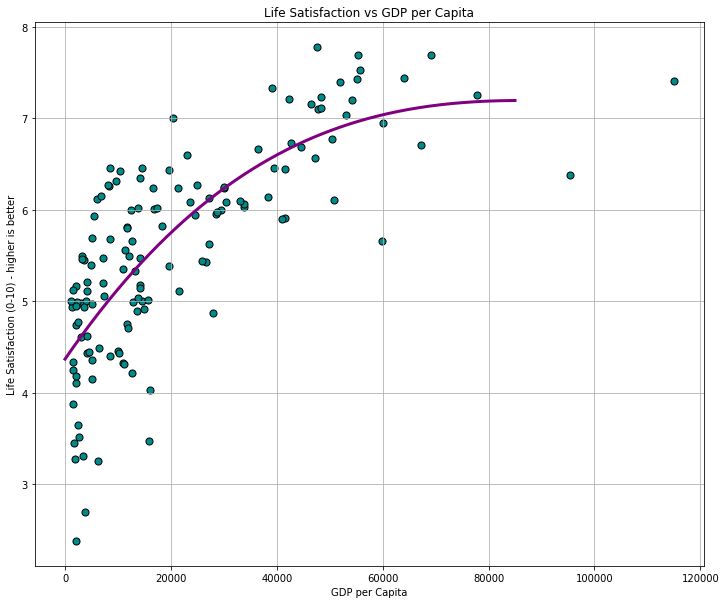

In [13]:
#GPA per capita vs Life satisfaction Polynomial Regression

#Creating two series, one containing life satisfaction and one containing gdp per capita
Life_satisfaction = df_merged_five['Life satisfaction in Cantril Ladder (World Happiness Report 2022)']
GDP_percapita = df_merged_five['GDP per capita, PPP (constant 2017 international $)']

#Creating the polynomial regression model based on our Y- and X- values
#source of inspiration (https://www.w3schools.com/python/python_ml_polynomial_regression.asp)
model = np.poly1d(np.polyfit(GDP_percapita,Life_satisfaction,3))
#from x:0 --> x:85000
line = np.linspace(0,85000,10000)

#plotting the scatter plot and polynomial regression line
plt.figure(figsize=(12, 10)) #needed to make it more readable
plt.scatter(GDP_percapita,Life_satisfaction, s=50, alpha=1, edgecolor='black',color='darkcyan', linewidth=1)
plt.plot(line,model(line), color='purple', linewidth=3)
plt.title('Life Satisfaction vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Satisfaction (0-10) - higher is better')
plt.grid('true')
plt.show()


Analysis/conclusion: By looking at the first plot, we could identify many of the Nordic countries such Sweden, Finland, Iceland, Denmark & Norway at the top in the middle, having a high GDP per capita and a high life satisfaction. We could also spot some countries with a relatively low Life satisfaction given their GDP per capita such as Hong Kong and Singapore. What's interesting is that Singapore also had a very high GDP per capita in relation to their average year of schooling. Looking at the second plot, we can spot an exponential like pattern with a positive relationship. We can also spot a decrease in the marginal increase of life satisfaction as we move to the right on the x-axis. Trying to find an explanation for this, we believe that more money after a certain degree does not make you much more satisfied (e.g Luxembourg with a GDP per capita almost twice of the Nordic countries but with the same life satisfaction). Similar to what we saw for GPA per capita VS life expectancy. Additionally, there may be other reasons for having a low life satisfaction while having a high GDP per capita, such as distribution of wealth. Although it would have been interesting to include, we decided to not include that as a factor in our analysis as it would have needed more extensive data collection to discuss and analyse. 

### Testing if average years of schooling impacts life satisfaction

Assumptions: Given that we can spot that there is some sort of correlation between average years of schooling and GDP per capita and between GDP per capita and life satisfaction, we believe that average year of schooling could also have an impact on life satisfaction. This is also the reason behind using average year of schooling as "x" and life satisfaction as"y", as the first likely being the driver for the second.

Decision: We decided to choose the same year (2017) of comparison as before as we are investigating the same subjects (average year of schooling, GDP per capita, life satisfaction) and want to so for the same period. We plotted our data in scatter plots to look for some type of correlation and/or pattern. Later we spotted a linear pattern and decided to add a linear regression line.

In [14]:
#Avarage years of schooling vs Life satisfaction 2017

#I will use our earlier variables in this task, instead of repeating the same code
#possible as we use the same year

#merging the dataframes, and making sure that the Entity and Year is the same
df_merged_six = pd.merge(df_life_satisfaction_2017,df_yearsofschooling_2017, on=['Entity','Year'])

#Making a scatter plot using plotly
fig = px.scatter(df_merged_six,
 x='Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))',
 y="Life satisfaction in Cantril Ladder (World Happiness Report 2022)",
 text="Entity", width=1000, height=600 , color='Life satisfaction in Cantril Ladder (World Happiness Report 2022)', labels= {"Life satisfaction in Cantril Ladder (World Happiness Report 2022)" : "Life Satisfaction", "Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))": "Avarage Years of Schooling"})

#Setting the "Entity" text centered above the data points
fig.update_traces(textposition='top center')

#naming and centering the title in the middle 
fig.update_layout(title_text='Avarage Year of Schooling VS Life Satisfaction',title_x = 0.5)

#Adding a frame
fig.update_layout(
    margin=dict(l=30, r=15, t=35, b=30),
    paper_bgcolor="LightSteelBlue",)
fig.show()

0.6547058944948065


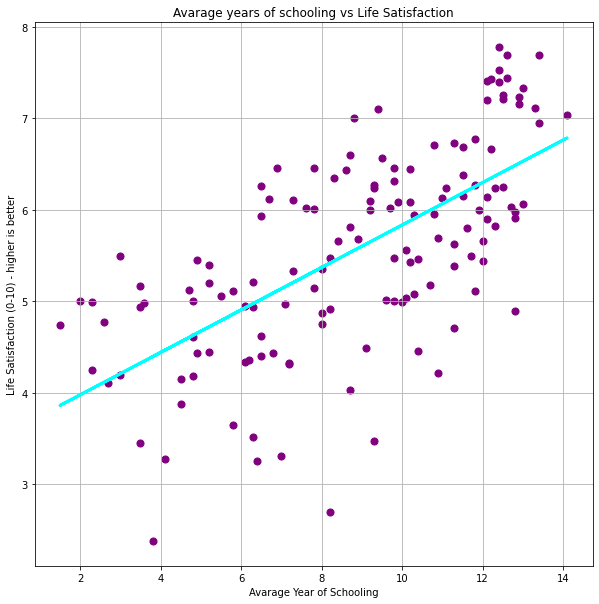

In [15]:
# Avarage Years of schooling vs Life satisfaction 2017 - Linear regression

#Imports
from scipy import stats

#Creating two series, one containing life satisfaction and one containing years of schooling
Life_satisfaction = df_merged_six['Life satisfaction in Cantril Ladder (World Happiness Report 2022)']
Avarage_year = df_merged_six['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']

#Creating our linear regression model/line
#Source of inspiration: https://www.w3schools.com/python/python_ml_linear_regression.asp
slope, intercept, r, p, std_err = stats.linregress(Avarage_year, Life_satisfaction)

# creating our k*x + m function
def function(x):
    return slope * x + intercept

model = list(map(function, Avarage_year))
print(r)

#plotting the scatter plot and the linear regression line
plt.figure(figsize=(10, 10))
plt.scatter(Avarage_year,Life_satisfaction, s=50, alpha=1, color='purple', linewidth=1)
plt.plot(Avarage_year,model, color ='cyan', linewidth=3)
plt.title('Avarage years of schooling vs Life Satisfaction')
plt.xlabel('Avarage Year of Schooling')
plt.ylabel('Life Satisfaction (0-10) - higher is better')
plt.grid('true')
plt.show()

Analysis/conclusion: By looking at the first plot, we can spot most of the Nordic countries in the upper right corner (high average year of schooling and a high life satisfaction), for example, Sweden, Finland, Norway, Iceland and Denmark. We can also see many African countries in the bottom, such as Sierra Leone, Rwanda, Zimbabwe  & Ethiopia having a low average year of schooling and a low life satisfaction. However, we can see a linear pattern where most of the countries with a very high life satisfaction (around 7-8), have a very high average year of schooling (around 12-14). Looking at the second plot, we do not have a really useful regression line for predicting values as we have a high variance residual. However, we can spot a positive correlation between Life satisfaction and average year of schooling. The R value is: 0.655 which is considered to be a "moderate" strength of relationship according to Mindrila and Balentyne (n.d), almost being a so called "strong" relationship (r>0.7). 

Mindrila and Balentyne (n.d): Source - https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=85ae1618-9b9c-4671-808b-a0cb8ea95e84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>